<center>
    <span style="color:#3ac9f0;font-family:serif; font-size:34px;">
        <b> NEVER GONNA LET YOU CHURN! 💕 </b>
    </span>
</center>

<center>
    <span style="font-family:Palatino; font-size:22px;">
        A data science solution that <span style="color:#f53d3d;"><i> reached 78% of churn customer </i></span> while achieving <span style="color:#f53d3d;"><i> 55% of ROI </i></span> for a Telco
    </span>
</center>

<a name="1"></a>
<div style="color:white; display:fill; border-radius:5px; background-color:#3ac9f0; font-size:250%; font-family:serif; letter-spacing:0.5px">
    <p style="padding:15px; color:white; font-size:25px">
        <span style="font-family:serif;">
            <b> Background </b> — Introduce Customer Churn and Outline Project Objectives
        </span>
    </p>
</div>

<center>
    <a href="https://youtu.be/dQw4w9WgXcQ">
        <img width="500px" height="500px" src="https://raw.githubusercontent.com/Jack-cky/TCC-Never_Gonna_Let_You_Churn/main/imgs/kaggle_never_gonna_let_you_churn.gif"/>
    </a>
</center>

<div style="font-size:12px;text-align: right"> Disclaimer: GIFs are not owned by author. </div>

<a name="1.1"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Introduction to Csutomer Churn </b></u>
    </span>
</left>

<center><span style="font-size:16px;"><i><b> Never gonna give you up </b></i></span></center>

For most companies, customers are the heart of the business, especially in the fast-paced business environment. Industries like Telecom and FMCG are providing services and goods for consumers to their needs. However, there are many competitors in the markets serving the same group of people. Gaining a bigger piece of market share determines how the company generate profits. That's why businesses don't want to let anyone go away.

<center><span style="font-size:16px;"><i><b> Never gonna let you down </b></i></span></center>

"_XXX is now on sale, and you can get a gift upon spending YYY dollar!_" Did you just receive a similar mobile notification or email from a nearby store? Keeping customer attention and excitement are very common strategies to raise shopping incentives and motivate purchase activities in marketing promotion. Under CRM or loyalty programmes, there are always some good deals, addition gamification on the mobile app and stampe collection to keep your awareness.

<center><span style="font-size:16px;"><i><b> Never gonna say goodbye </b></i></span></center>

Sometimes a customer gets tired of the current services and wants to switch to another company's offerings. A business is losing market shares if one says goodbye to customers. So they would find solutions to keep the existing customers and attract more new customers. Customer churn prediction comes to the place where businesses can try to reach out to customers who intend to stop using the services and re-activate them.

<a name="1.2"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Project Objectives </b></u>
    </span>
</left>

**So, what is customer churn?**
* Customer churn is a terminology that describes a customer who has stopped using a company's offerings for a given period
* Churn rate (= number of lapse customers over the total number of customers) is often used on the marketing team for monitoring customer lapse as a KPI
* Churn prediction is aimed to find out customers at high risk to churn and reducing promotion costs to customers at low risk to churn

**What is the objective of this notebook?**
* Analyse customers and company's offerings from a Telcom company
* Predict customers are likely to churn while understanding customer behaviour
* Apply prediction to prevent customer churn and maximise ROI

**What is the data source being used in this project?**
* "_Telco Customer Churn_" on Kaggle provides a dataset from a Telco company to analyse customer data and develop solutions to aid customer retention programs
* Without a doubt, the dataset is very ideal and not common in reality
* Similar to the Titanic dataset, this data source is targeted for technical demonstration and doesn't mean anything

**Table of Content**
1. [Background](#1)
    * [Introduction to Csutomer Churn](#1.1)
    * [Project Objectives](#1.2)
2. [Abstract](#2)
3. [Exploratory Data Analysis](#3)
    * [Libraries and Dataset](#3.1)
    * [Customer Data Understanding](#3.2)
    * [Raw Data Cleansing](#3.3)
    * [Data Integrity Check](#3.4)
    * [Customers Behaviour Visualisation (Tableau)](#3.5)
4. [Churn Model Building](#4)
    * [Feature Engineering](#4.1)
    * [Data Pre-processing](#4.2)
    * [Battle of Machine Learning Models](#4.3)
        * [Bleeding Heart Model](#4.3.1)
        * [Logistic Regression Model](#4.3.2)
        * [Random Forest Model](#4.3.3)
        * [eXtreme Gradient Boosting Model](#4.3.4)
        * [Model Evaluation Summary](#4.3.5)
5. [Churn Prediction Application](#5)
    * [Service Charges Understanding](#5.1)
    * [Churn Prediction on Production](#5.2)
    * [ROI of Customer Retention](#5.3)
6. [Conclusion](#6)

<a name="2"></a>
<div style="color:white; display:fill; border-radius:5px; background-color:#3ac9f0; font-size:250%; font-family:serif; letter-spacing:0.5px">
    <p style="padding:15px; color:white; font-size:25px">
        <span style="font-family:serif;">
            <b> Abstract </b>
        </span>
    </p>
</div>

**Key Results to Take Out**
* About 27% of customers stopped using the company's offerings in the "last" month
* XGB classifier is used as the final prediction model with oversampling method (dev performance: accuracy: 78%; precision: 56%; recall: 73%; f1: 64%)
* Attributes `Partner`, `Dependents`, `Contract` and `InternetService` are viewed as important in the eyeball
* Attributes `MonthlyCharges`, `tenure` and `TotalCharges` are evaluated as important from the model
* 78% of churn customers receive a one-time discount promotion which achieves 55% of ROI on the customer retention programme

<a name="3"></a>
<div style="color:white; display:fill; border-radius:5px; background-color:#3ac9f0; font-size:250%; font-family:serif; letter-spacing:0.5px">
    <p style="padding:15px; color:white; font-size:25px">
        <span style="font-family:serif;">
            <b> Exploratory Data Analysis </b> — Understand Customers Behaviour
        </span>
    </p>
</div>

<a name="3.1"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Libraries and Dataset </b></u>
    </span>
</left>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

import warnings
from IPython.display import display_html

np.random.seed(852)
pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

In [2]:
file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(f"../input/telco-customer-churn/{file_name}")

nrow, ncol = df.shape
print(f"Imported `{file_name}` with {ncol:,} columns and {nrow:,} rows.")

Imported `WA_Fn-UseC_-Telco-Customer-Churn.csv` with 21 columns and 7,043 rows.


<a name="3.2"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Customer Data Understanding </b></u>
    </span>
</left>

In [3]:
desc_dtype = df.dtypes
desc_iqr = df.describe() \
    .T[["min", "25%", "50%", "75%", "max"]] \
    .astype(str) \
    .apply(list, axis=1)
desc_uniq = df.select_dtypes(include="object") \
    .apply(pd.Series.unique)

desc = pd.concat([desc_iqr, desc_uniq])
desc = pd.concat([desc_dtype, desc], axis=1)
desc.columns = ["data type", "description"]
desc.index.name = "column name"

desc = desc.reset_index() \
    .groupby(["data type", "column name"])["description"] \
    .apply(list)

display(desc)

data type  column name     
int64      SeniorCitizen                             [[0.0, 0.0, 0.0, 0.0, 1.0]]
           tenure                                 [[0.0, 9.0, 29.0, 55.0, 72.0]]
float64    MonthlyCharges                  [[18.25, 35.5, 70.35, 89.85, 118.75]]
object     Churn                                                     [[No, Yes]]
           Contract                       [[Month-to-month, One year, Two year]]
           Dependents                                                [[No, Yes]]
           DeviceProtection                     [[No, Yes, No internet service]]
           InternetService                              [[DSL, Fiber optic, No]]
           MultipleLines                           [[No phone service, No, Yes]]
           OnlineBackup                         [[Yes, No, No internet service]]
           OnlineSecurity                       [[No, Yes, No internet service]]
           PaperlessBilling                                          [[Yes, No]]


According to the data description, each row represents a customer, which implies there are 7,043 individuals in the given dataset. Besides, customer attributes are classified into 4 groups (demographic, account, services and status). Also, be aware that the column `Churn` is being captured for the "last" month, which means the data is not on demand. It is reasonable to assume the other attributes are also coming from the "last" month. In layman's words, it should be noted for the version of the data source.

Without a doubt, the column `Churn` is the response variable under the objective, while others are explanatory variables. As we can see in the above, column `SeniorCitizen` and `TotalCharges` are a bit weird in terms of their values and data types. Column `SeniorCitizen` is stored as integer type with values 0 and 1, while column `TotalCharges` is formatted as string data type. Furthermore, columns related to services are quite redundant. For example, column `MultipleLines` has 2 values ("No" and "No phone service") pointing to the same physical meaning. Casting and deducing the raw data could help us to better understand how the customers behaved in the "last" month. Let's do a data cleansing and integrity check in the next section.

<a name="3.3"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Raw Data Cleansing </b></u>
    </span>
</left>

In [4]:
check = df["TotalCharges"].str.contains(r"^(?!.\d)", regex=True)
display(df[check])

dc = "TotalCharges"
df[dc] = pd.to_numeric(df[dc], errors="coerce").fillna(0)

dc = "SeniorCitizen"
check = df[dc].astype(bool)
df[dc] = np.where(check, "Yes", "No")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Checking with column `TotalCharges`, the total amount charged to the customer, 11 customers absented a value on the attribute. Note that these customers have values 0 on column `tenure`, which denotes they are "new" customers to the company. Assuming customers must pay for any services, only "new" customers can have an empty payment history. Following the business logic, since these customers didn't pay any costs before, the column should be filled with value zero. Otherwise, it may commit data fabrication.

For column `SeniorCitizen`, the indicator of determining whether the customer is a senior citizen, is stored as an integer type. Though there is no problem using 0 and 1 as a proxy of "No" and "Yes", casting the column to string data type would be beneficial in visualising data in human language. Hence, data type conversion serves the purpose.

<a name="3.4"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Data Integrity Check </b></u>
    </span>
</left>

In [5]:
# (1) check if NULL values present
assert df.isna().sum().sum() == 0

# (2) check if customer is unique per record
assert df.shape[0] == df["customerID"].nunique()

# company's offerings
service_main = ["PhoneService", "InternetService",]
sub_serv_phone = ["MultipleLines",]
sub_serv_internet = [
    "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies",
]
service = service_main + sub_serv_phone + sub_serv_internet

# (3) check if customer without services
assert sum(df[service].apply(lambda y: sum("No" in col for col in y), axis=1) == len(service)) == 0

# (4) check if phone sub-service have phone service
assert all(df.query("PhoneService == 'No'")[sub_serv_phone] == "No phone service")

# (5) check if internet sub-service have internet service
assert all(df.query("InternetService == 'No'")[sub_serv_internet] == "No internet service")

print("Data integrity check PASSED!")

Data integrity check PASSED!


Several assumptions were placed on the dataset, such as each row representing a single customer and sub-services must have a parent service. To ensure the data is error-free, we did 5 assertions to verify the data quality. To avoid the "garbage in, garbage out" situation, just a few lines of code, it is worthwhile to make sure the data pass all the test.

**List of verifications**
1. Does the dataset contain null values?
2. Does the dataset record a customer more than once?
3. Are there any customers who do not have any services?
4. Are there any customers using multiple phone lines, but are absent phone service?
5. Are there any customers using internet-related offerings, but are absent internet service?

<a name="3.5"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Customers Behaviour Visualisation (Tableau) </b></u>
    </span>
</left>

In [6]:
# df.to_excel("tcc_data_after_cleansing.xlsx", index=False)

<center>
    <a href="https://youtu.be/dQw4w9WgXcQ">
        <img width="500px" height="500px" src="https://raw.githubusercontent.com/Jack-cky/TCC-Never_Gonna_Let_You_Churn/main/imgs/tableau_dashboard.png"/>
    </a>
</center>

Let's transit to [Tableau Public](https://youtu.be/dQw4w9WgXcQ) (Oops, should be this [one](https://public.tableau.com/app/profile/jackcky/viz/TCC_EDA/EDA)) for investigating customers' behaviour. Rather than building charts in this notebook, we use Tableau to check data distribution quickly with the drag-and-drop option. The dashboard also allows end-users to explore customer insights by themselves.

**Key findings on EDA**
* (Top-Right) About 27% of customers stopped using the services from the "last" month, which implies an imbalance in the response variable
* (Middle) Some attributes show obvious divergencies in churn status, which indicates the importance of these variables to the response variable
    * Explanatory variables include `Partner`, `Dependents`, `Contract` and `InternetService`
* (Bottom-Left) Customers who used the services for a long period are less likely to switch to other competitors' offerings
* (Bottom-Right) A non-linear phenomenon is observed between `MonthlyCharges` and `TotalCharges`, which means customers are switching within services

<a name="4"></a>
<div style="color:white; display:fill; border-radius:5px; background-color:#3ac9f0; font-size:250%; font-family:serif; letter-spacing:0.5px">
    <p style="padding:15px; color:white; font-size:25px">
        <span style="font-family:serif;">
            <b> Churn Model </b> — Manipulate Customer Data and Build Predictive Model on Churn Status
        </span>
    </p>
</div>

<a name="4.1"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Feature Engineering </b></u>
    </span>
</left>

In [7]:
dc = "customerID"
df.columns = ["_" + col if col in dc else col for col in df.columns]

dc = ["Partner", "Dependents",]
check = df[dc].apply(lambda y: "Yes" in list(y), axis=1)
df["Relationship"] = np.where(check, "Family", "Single")
df.columns = ["_" + col if col in dc else col for col in df.columns]

dc = "Contract"
check = df[dc].isin(["Month-to-month"])
df[dc] = np.where(check, "No", "Yes")

dc = "PaymentMethod"
check = df[dc].str.contains("automatic")
df[dc] = np.where(check, "Automatic", "Manual")

dc = "InternetService"
check = df[dc] == "DSL"
df["DslService"] = np.where(check, "Yes", "No")
check = df[dc] == "Fiber optic"
df["FiberOpticService"] = np.where(check, "Yes", "No")
df.columns = ["_" + col if col in dc else col for col in df.columns]

dc = [
    "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies",
]
check = df[dc].isin(["Yes", "No"])
df[dc] = df[dc].where(check, "No")

check = df["MonthlyCharges"] * df["tenure"] != df["TotalCharges"]
df["ContractUpdate"] = np.where(check, "Yes", "No")

df = df.apply(
    lambda y: LabelEncoder().fit_transform(y) \
    if y.dtype == "object" else y
)

df.sample(5)

,_customerID,gender,SeniorCitizen,_Partner,_Dependents,tenure,PhoneService,MultipleLines,_InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Relationship,DslService,FiberOpticService,ContractUpdate
2600,1550,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,70.10,70.10,0,1,0,1,0
2886,2214,0,0,0,0,60,1,0,1,1,0,1,1,1,1,0,1,0,104.95,6236.75,0,1,0,1,1
782,177,1,0,1,1,27,1,0,0,1,1,0,0,0,0,0,1,0,54.75,1510.30,0,0,1,0,1
773,4130,0,0,1,0,5,1,0,1,1,0,1,0,0,1,0,1,1,88.90,454.15,1,0,0,1,1
6535,355,1,0,0,0,35,1,0,1,0,1,1,0,1,1,1,1,0,102.35,3626.10,1,1,0,1,1


As we saw in the previous section, some columns have redundant labels and do not have much physical meaning to keep all labels. Hence, eliminating the range of labels would make more sense in human language. Since column `InternetService` has multiple labels, one-hot encoding would split it into separate columns. In addition, by comparing the difference between `TotalCharges` and `MonthlyCharges` times `tenure`, it is possible to know whether a customer has updated their service before. To enable further checking, dropping unused columns is not traceable for a particular customer. Instead, adding an under an underscore in front of the column name can indicate an unused column without removing it.

<a name="4.2"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Data Pre-processing </b></u>
    </span>
</left>

In [8]:
dc_y = ["Churn",]
dc_X = [col for col in df.columns if not (col in dc_y or col.startswith("_"))]

# split data into train-dev and test sets
train_dev, test = train_test_split(df, test_size=0.1, stratify=df["Churn"])
y_train_dev, X_train_dev = train_dev[dc_y].values.reshape(-1), train_dev[dc_X].values
y_test, X_test = test[dc_y].values.reshape(-1), test[dc_X].values

# split data into train and dev sets
train, dev = train_test_split(train_dev, test_size=0.2, stratify=train_dev["Churn"])
y_train, X_train = train[dc_y].values.reshape(-1), train[dc_X].values
y_dev, X_dev = dev[dc_y].values.reshape(-1), dev[dc_X].values

To compute performance metrics of machine learning models, we split data into `train` and `dev` sets. On top of that, we would like to simulate the actual situation when putting the optimal model into a production environment. Customer data is also split into `train-dev` and `test` sets. The train set will be used to build several machine learning models, and evaluation will undergo with the dev set, which selects the optimal model. After obtaining the model, the test set will be used to replicate the learning process for estimating customer churn status and calculating ROI.

In [9]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)

X_train_dev = scaler.fit_transform(X_train_dev)
X_test = scaler.transform(X_test)

In case of outliers affecting the model learning, we scale the range of values in every quantity attribute using `min-max normalization`.

In [10]:
oversampler = SMOTE()

X_train, y_train = oversampler.fit_resample(X_train, y_train)

X_train_dev, y_train_dev = oversampler.fit_resample(X_train_dev, y_train_dev)

To handle the imbalance response variable, we adopt the `over-sampling method` to balance the weights among the positive and the negative classes. Note that we assume the customers behave in a similar manner which expects about 27% of the monthly churn rate, so we only apply the over-sampling method to the train (and train-dev) set and not for the dev (and test) set.

<a name="4.3"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Battle of Machine Learning Models </b></u>
    </span>
</left>

In [11]:
# create dictionaries to store model performance history
model_evaluation = {}
model_metrics = {}

def evaluate_performance(model_name, y, pi_hat, hist=model_evaluation):
    fpr, tpr, _ = roc_curve(y,  pi_hat)
    auc = roc_auc_score(y, pi_hat)
    precision, recall, _ = precision_recall_curve(y, pi_hat)
    
    precision, recall, _ = precision_recall_curve(y, pi_hat)
    auprc = average_precision_score(y, pi_hat)
    
    hist[model_name] = {
        "fpr": fpr, "tpr": tpr,
        "roc_label": f"{model_name:<5}: {auc:>6.4f}",
        "precision": precision, "recall": recall,
        "auprc_label": f"{model_name:<5}: {auprc:>6.4f}",
    }
    
    return hist

def plot_roc_prc(model_name=None, hist=model_evaluation):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4.5))
    
    title = "ROC and PRC Plots"
    if model_name is not None and "SM" in model_name:
        title += " on Over-sampling"
    fig.suptitle(title)
    
    if model_name is not None and not isinstance(model_name, list):
        model_name = [model_name]
    
    # ROC
    for key in hist.keys():
        if model_name is not None and key not in model_name:
            continue
        ax1.plot(hist[key]["fpr"], hist[key]["tpr"], label=hist[key]["roc_label"])
    ax1.plot([0, 1], [0, 1], "r--")
    ax1.set_title("Receiver Operating Characteristic")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_xlabel("False Positive Rate")
    ax1.legend(loc=4, prop={"family": "monospace"})
    
    # PRC
    for key in hist.keys():
        if model_name is not None and key not in model_name:
            continue
        ax2.plot(hist[key]["precision"], hist[key]["recall"], label=hist[key]["auprc_label"])
    ax2.set_title("Precision-Recall Curve")
    ax2.set_ylabel("Precision")
    ax2.set_xlabel("Recall")
    ax2.legend(loc=3, prop={"family": "monospace"})
    
    plt.show()
    
    return None

def evaluate_metrics(model_name, tag, y, pi_hat, hist=model_metrics):
    y_hat = (pi_hat >= 0.5).astype(int)
    accuracy = accuracy_score(y, y_hat)
    metrics = precision_recall_fscore_support(y, y_hat)
    tn, fp, fn, tp = confusion_matrix(y, y_hat).ravel()
    
    evaluation = pd.DataFrame(list(zip(*metrics))) \
        .set_axis(["Precision", "Recall", "F1-score", "Support"], axis=1) \
        .assign(TruePrediction=[tn, tp]) \
        .assign(FalsePrediction=[fn,fp])
    evaluation.insert(0, "Accuracy", accuracy)
    evaluation.index = ["Negative", "Positive"]
    
    hist[model_name] = {} if model_name not in hist else hist[model_name]
    hist[model_name][tag] = evaluation.round(4)
    
    return hist

def display_model_summary(model_name, hist=model_metrics):
    dfs = {
        "Metrics on Train Set": hist[model_name]["Train"],
        "Metrics on Dev Set": hist[model_name]["Dev"],
    }
    
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f"<div> <h4>{title}</h4> {df_html}</div>"
        html += cur_html
    
    html= f"""
    <div style="display:flex; gap:30px; justify-content:flex-start;">
        {html}
    </div>
    """
    
    display_html(html, raw=True)
    
    return None

<a name="4.3.1"></a>
<left>
    <span style="font-size:18px;">
        <u><b> @ Bleeding Heart Model </b></u>
    </span>
</left>

In [12]:
class BleedingHeart():
    def __init__(self):
        
        return None
    
    def predict(self, X):
        pi_hat = np.ones(X.shape[0])
        
        return pi_hat

model_bh = BleedingHeart()

In [13]:
pi_hat = model_bh.predict(X_train)
model_evaluation = evaluate_performance("BH", y_train, pi_hat)
model_metrics = evaluate_metrics("BH", "Train", y_train, pi_hat)

pi_hat = model_bh.predict(X_dev)
model_metrics = evaluate_metrics("BH", "Dev", y_dev, pi_hat)

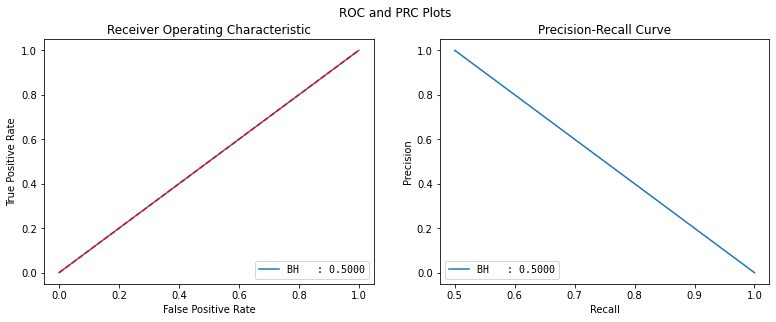

,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.5,0.0,0.0,0.0000,3725,0,0
Positive,0.5,0.5,1.0,0.6667,3725,3725,3725
,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.2658,0.0000,0.0,0.0000,931,0,0
Positive,0.2658,0.2658,1.0,0.4199,337,337,931


In [14]:
plot_roc_prc("BH")
display_model_summary("BH")

Under `Bleeding Heart Model`, it acts as a baseline model, which predicts 1 for every customer. In customer retention programmes, the best approach to reach out to customers who will churn in the given period is assuming all customers will churn! As the performance shown above, the recall performance achieves the maximum in both train and dev sets. Very impressive, but often we don't have many resources to promote all the customers, which introduces cost! So, the model provides a reference for evaluating other fancy machine learning models.

<a name="4.3.2"></a>
<left>
    <span style="font-size:18px;">
        <u><b> @ Logistic Regression Model </b></u>
    </span>
</left>

In [15]:
# lr_params = {
#     "C": [0.001, 0.01, 0.1 , 1, 10, 100, 1000],
#     "class_weight": ["auto"],
#     "max_iter": [10000],
#     "penalty": ["elasticnet"],
#     "solver": ["saga"],
#     "l1_ratio": stats.uniform(0, 1),
# }

# rs_lr_params = {
#     "estimator": LogisticRegression(),
#     "param_distributions": lr_params,
#     "scoring": "roc_auc",
#     "cv": 3,
#     "verbose": 1,
#     "n_jobs": -1,
# }

# model_lr = RandomizedSearchCV(**rs_lr_params)

model_lr = LogisticRegression(**{
    "C": 100,
    "class_weight": "auto",
    "l1_ratio": 0.24938921582538243,
    "max_iter": 10000,
    "penalty": "elasticnet",
    "solver": "saga",
})

In [16]:
model_lr.fit(X_train, y_train)
# model_lr.best_params_

pi_hat = model_lr.predict_proba(X_train)[:, 1]
model_evaluation = evaluate_performance("LR (T)", y_train, pi_hat)
model_metrics = evaluate_metrics("LR", "Train", y_train, pi_hat)

pi_hat = model_lr.predict_proba(X_dev)[:, 1]
model_evaluation = evaluate_performance("LR (D)", y_dev, pi_hat)
model_metrics = evaluate_metrics("LR", "Dev", y_dev, pi_hat)

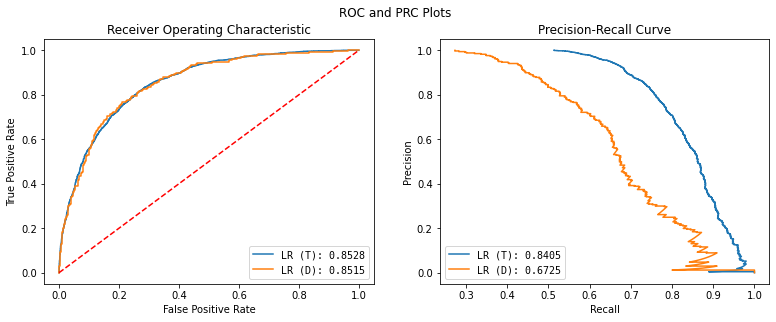

,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7736,0.7960,0.7356,0.7646,3725,2740,702
Positive,0.7736,0.7542,0.8115,0.7818,3725,3023,985
,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7571,0.9093,0.7433,0.8180,931,692,69
Positive,0.7571,0.5286,0.7953,0.6351,337,268,239


In [17]:
plot_roc_prc(["LR (T)", "LR (D)"])
display_model_summary("LR")

Under `Logistic Regression Model`, it achieves 76% of accuracy and can reach out to 80% of churn customers. Though there are almost half of the positive churn predictions are invalid, it is still acceptable if we would balance the ROI properly. Compared to the baseline model, the model outperforms most of the evaluation metrics, except the recall one. Still, the best model we have created.

<a name="4.3.3"></a>
<left>
    <span style="font-size:18px;">
        <u><b> @ Random Forest Model </b></u>
    </span>
</left>

In [18]:
# rf_params = {
#     "criterion" : ["gini", "entropy"],
#     "max_depth" : stats.randint(5, 15),
#     "max_features": ["sqrt", "log2"],
#     "min_samples_leaf": stats.randint(10, 50),
#     "n_estimators" : stats.randint(200, 500),
# }

# rs_rf_params = {
#     "estimator": RandomForestClassifier(),
#     "param_distributions": rf_params,
#     "scoring": "roc_auc",
#     "cv": 3,
#     "verbose": 1,
#     "n_jobs": -1,
# }

# model_rf = RandomizedSearchCV(**rs_rf_params)

model_rf = RandomForestClassifier(**{
    "criterion": "gini",
    "max_depth": 13,
    "max_features": "log2",
    "min_samples_leaf": 25,
    "n_estimators": 366,
})

In [19]:
model_rf.fit(X_train, y_train)
# model_rf.best_params_

pi_hat = model_rf.predict_proba(X_train)[:, 1]
model_evaluation = evaluate_performance("RF (T)", y_train, pi_hat)
model_metrics = evaluate_metrics("RF", "Train", y_train, pi_hat)

pi_hat = model_rf.predict_proba(X_dev)[:, 1]
model_evaluation = evaluate_performance("RF (D)", y_dev, pi_hat)
model_metrics = evaluate_metrics("RF", "Dev", y_dev, pi_hat)

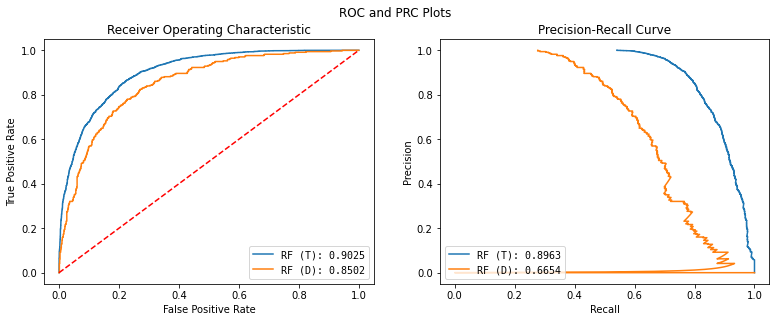

,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.8197,0.8424,0.7866,0.8135,3725,2930,548
Positive,0.8197,0.7998,0.8529,0.8255,3725,3177,795
,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7744,0.9036,0.7755,0.8347,931,722,77
Positive,0.7744,0.5544,0.7715,0.6452,337,260,209


In [20]:
plot_roc_prc(["RF (T)", "RF (D)"])
display_model_summary("RF")

Under `Random Forest Model`, it slightly overfits the train set while compared to the metrics in the test set, yet, it has better performance than the LR model in terms of the F1 score. The model is a bit conservative and only predicts 466 customers as churn customers, which is 41 fewer positive predictions than the LR model.

<a name="4.3.4"></a>
<left>
    <span style="font-size:18px;">
        <u><b> @ eXtreme Gradient Boosting Model </b></u>
    </span>
</left>

In [21]:
# xgb_params = {
#     "colsample_bytree": stats.uniform(0, 1),
#     "eval_metric": ["auc"],
#     "gamma": stats.uniform(0.1, 3),
#     "learning_rate": stats.uniform(0.01, 0.3),
#     "max_depth": stats.randint(3, 10),
#     "min_child_weight": stats.randint(0, 5),
#     "n_estimators": stats.randint(500, 1500),
#     "objective": ["binary:logistic"],
#     "reg_alpha": stats.expon(0, 50),
#     "reg_lambda": stats.expon(0, 50),
#     "scale_pos_weight": stats.uniform(1, 2),
#     "subsample": stats.uniform(0.3, 1),
# }

# rs_xgb_params = {
#     "estimator": XGBClassifier(),
#     "param_distributions": xgb_params,
#     "scoring": "roc_auc",
#     "cv": 3,
#     "verbose": 1,
#     "n_jobs": -1,
# }

# model_xgb = RandomizedSearchCV(**rs_xgb_params)

model_xgb = XGBClassifier(**{
    "colsample_bytree": 0.17044992323722397,
    "eval_metric": "auc",
    "gamma": 1.2279005792340887,
    "learning_rate": 0.10833685981906044,
    "max_depth": 4,
    "min_child_weight": 4,
    "n_estimators": 1308,
    "objective": "binary:logistic",
    "reg_alpha": 6.445865477624707,
    "reg_lambda": 9.514651434007304,
    "scale_pos_weight": 1.354488282025285,
    "subsample": 0.717404820127926,
})

In [22]:
model_xgb.fit(X_train, y_train)
# model_xgb.best_params_

pi_hat = model_xgb.predict_proba(X_train)[:, 1]
model_evaluation = evaluate_performance("XGB (T)", y_train, pi_hat)
model_metrics = evaluate_metrics("XGB", "Train", y_train, pi_hat)

pi_hat = model_xgb.predict_proba(X_dev)[:, 1]
model_evaluation = evaluate_performance("XGB (D)", y_dev, pi_hat)
model_metrics = evaluate_metrics("XGB", "Dev", y_dev, pi_hat)

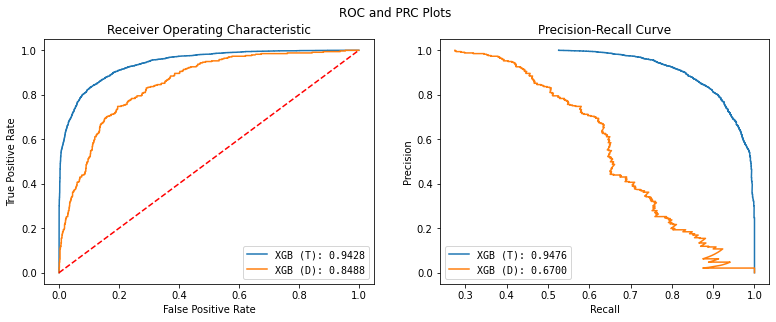

,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.8587,0.8872,0.8217,0.8532,3725,3061,389
Positive,0.8587,0.8340,0.8956,0.8637,3725,3336,664
,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7863,0.8938,0.8045,0.8468,931,749,89
Positive,0.7863,0.5767,0.7359,0.6467,337,248,182


In [23]:
plot_roc_prc(["XGB (T)", "XGB (D)"])
display_model_summary("XGB")

Under `eXtreme Gradient Boosting Model`, it acts the same way as the RF model, which also overfits the train set. However, it can somehow manage to achieve a better score in precision over the other 3 models. The model is the most conservative predictor, which only predicts 438 positive statuses on customers. Since the XGB model beats other models in terms of precision, it will be used to replicate the production-level prediction.

<a name="4.3.5"></a>
<left>
    <span style="font-size:18px;">
        <u><b> @ Model Evaluation Summary </b></u>
    </span>
</left>

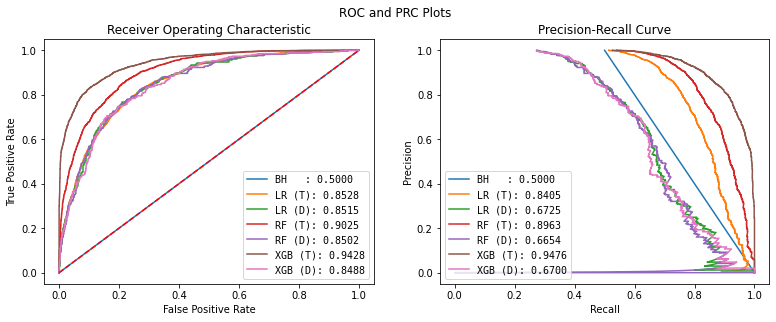

// Metrics performance of BH.


,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.2658,0.0000,0.0,0.0000,931,0,0
Positive,0.2658,0.2658,1.0,0.4199,337,337,931


// Metrics performance of LR.


,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7571,0.9093,0.7433,0.8180,931,692,69
Positive,0.7571,0.5286,0.7953,0.6351,337,268,239


// Metrics performance of RF.


,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7744,0.9036,0.7755,0.8347,931,722,77
Positive,0.7744,0.5544,0.7715,0.6452,337,260,209


// Metrics performance of XGB.


,Accuracy,Precision,Recall,F1-score,Support,TruePrediction,FalsePrediction
Negative,0.7863,0.8938,0.8045,0.8468,931,749,89
Positive,0.7863,0.5767,0.7359,0.6467,337,248,182


In [24]:
plot_roc_prc()

for model in model_metrics.keys():
    print(f"// Metrics performance of {model}.")
    display(model_metrics[model]["Dev"])

<a name="5"></a>
<div style="color:white; display:fill; border-radius:5px; background-color:#3ac9f0; font-size:250%; font-family:serif; letter-spacing:0.5px">
    <p style="padding:15px; color:white; font-size:25px">
        <span style="font-family:serif;">
            <b> Churn Prediction Application </b> — Churn Prediction and Calculate ROI
        </span>
    </p>
</div>

<a name="5.1"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Service Charges Understanding </b></u>
    </span>
</left>

In [25]:
service = [
    "PhoneService",
    "MultipleLines",
    "DslService", "FiberOpticService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies",
]

Y = df["MonthlyCharges"]
X = df[service]
model = sm.OLS(Y,X)
results = model.fit()

results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
PhoneService,19.9780,0.024,830.788,0.000,19.931,20.025
MultipleLines,5.0167,0.028,178.879,0.000,4.962,5.072
DslService,25.0040,0.034,725.253,0.000,24.936,25.072
FiberOpticService,49.9823,0.037,1355.345,0.000,49.910,50.055
OnlineSecurity,5.0156,0.031,162.802,0.000,4.955,5.076
OnlineBackup,4.9914,0.029,171.232,0.000,4.934,5.049
DeviceProtection,5.0197,0.030,164.790,0.000,4.960,5.079
TechSupport,5.0313,0.031,159.943,0.000,4.970,5.093
StreamingTV,9.9675,0.032,314.394,0.000,9.905,10.030
StreamingMovies,9.9609,0.032,313.857,0.000,9.899,10.023


<a name="5.2"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # Churn Prediction on Production </b></u>
    </span>
</left>

In [26]:
model = XGBClassifier(**model_xgb.get_xgb_params())
model.fit(X_train_dev, y_train_dev)
pi_hat = model.predict_proba(X_test)[:, 1]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

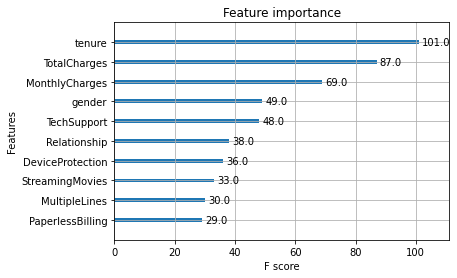

In [27]:
model.get_booster().feature_names = dc_X
plot_importance(model, max_num_features=10)

In [28]:
test["y_hat"] = (pi_hat > 0.5).astype(int)

msg = ""
n_predict = test.query("y_hat == 1").shape[0]
n_churn = test.query("Churn == 1").shape[0]
n_true_positive = test.query("Churn == 1 and y_hat == 1").shape[0]

msg += f"The model predicts {n_predict:,} customers will churn. "
msg += f"There are {n_churn:,} churn customers. "
msg += f"Successfully reach out {n_true_positive:,} churn customers."

print(msg)

The model predicts 282 customers will churn. There are 187 churn customers. Successfully reach out 146 churn customers.


In layman's terms on customer retention programmes, we can **reach out to 78% of churn customers** and offer promotions to those customers in advance for retention. **About 47% of promotions are sent out to non-churn customers**, which is not a negative outcome and may have long-term loyalty effects. The results are very stratifying and super useful for the marketing team to target a specific group of customers to engage with promotion offers!

<a name="5.3"></a>
<left>
    <span style="font-size:24px;">
        <u><b> # ROI of Customer Retention </b></u>
    </span>
</left>

In [29]:
customer_stay = test.query("y_hat == 1 and Churn == 1").sample(76)

gain = sum(customer_stay["MonthlyCharges"] * 0.8)
cost = sum(customer_stay["MonthlyCharges"] * 0.2) \
    + sum(test.query("y_hat == 1 and Churn == 0")["MonthlyCharges"] * 0.2)
roi = (gain - cost) / cost * 100

print(f"The customer retention programme attains {roi:.2f}% ROI.")

The customer retention programme attains 54.55% ROI.


To engage customers at high risk to churn, an exclusive 20% off service charges discount will be given to those positively predicted customers. Assuming only half of the churn customers can be re-engaged from the customer retention programme, we can win 55% of the ROI from the campaign, which is worthwhile investing as part of the loyalty programme in the long run. The act of sending out promotional offers also improves the relationship with customers, which has a positive effect on the company.

<a name="6"></a>
<div style="color:white; display:fill; border-radius:5px; background-color:#3ac9f0; font-size:250%; font-family:serif; letter-spacing:0.5px">
    <p style="padding:15px; color:white; font-size:25px">
        <span style="font-family:serif;">
            <b> Conclusion </b>
        </span>
    </p>
</div>

<center>
    <a href="https://youtu.be/dQw4w9WgXcQ">
        <img width="500px" height="500px" src="https://github.com/Jack-cky/TCC-Never_Gonna_Let_You_Churn/blob/main/imgs/kaggle_never_gonna_let_you_churn_2.gif?raw=true"/>
    </a>
</center>

<div style="font-size:12px;text-align: right"> Disclaimer: GIFs are not owned by author. </div>

<center><span style="font-size:16px;"><i><b> You wouldn't get this from any other guy </b></i></span></center>

Exclusive promotional offers provide incentives for customers to stay with the services. This attracts and encourages customers continuously use the services and grows customer loyalty to the company. With the use of churn prediction, we can effectively reach out to customers at high risk to churn and save unnecessary resources to improve the ROI of the customer retention programme.